In [1]:
# Import the libraries
import re
import os
import sys
import math
import random
import csv
import time
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
def read_files(file_name):
    data = []
    with open('pp3data/' + file_name, 'r') as f:
        # creating a csv reader object
        f_csv = csv.reader(f)
        # extracting each data row one by one
        for row in f_csv:
            data.append(row)
    return data

## Logistic

TRAINING SET :  (2000, 60) (2000, 1)

	!!!!!!!!!!!!!!!! RESULTS Task 1 - Logistic !!!!!!!!!!!!!!!!


 Mean of training errors per training set size :  [30.9, 26.566666666666666, 23.766666666666666, 20.3, 18.666666666666668, 17.466666666666665, 16.9, 16.233333333333334, 14.566666666666666, 16.0]

 SD of training errors per training set size :  [63.81919773861153, 58.80118101610619, 52.89340433572242, 50.115965519981735, 46.183210032314655, 45.28850724950966, 43.28999114499024, 41.4404659990959, 37.37528892493303, 41.010567743773876]

 Mean of run time per iteration per training set size :  [0.0021529356638590497, 0.0037380297978719073, 0.006329401334126791, 0.010774072011311848, 0.014901455243428547, 0.01954357624053955, 0.02672297159830729, 0.028281641006469727, 0.033153049151102704, 0.04046089649200439]

 Mean of GLM iterations per training set size :  [5.4, 6.033333333333333, 6.166666666666667, 6.533333333333333, 6.7, 6.766666666666667, 6.766666666666667, 6.9, 6.9, 6.9]

 		*********

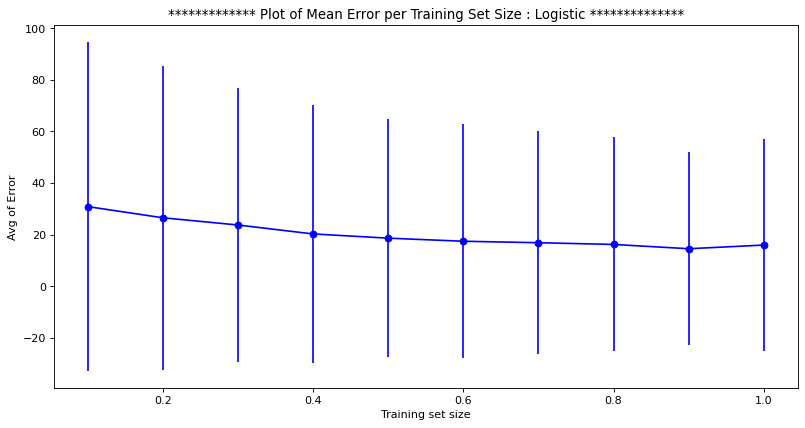


 		************* Plot of Mean Run time per iteration **************



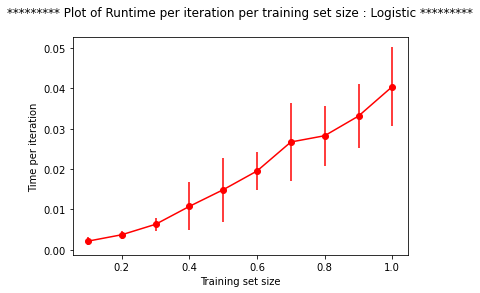


 		************* Plot of Mean GLM Iteration **************



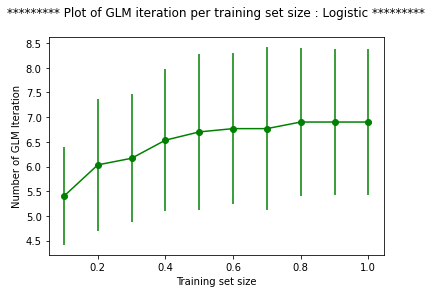

In [15]:
#def sigmoid(x): return 1 / (1 + np.exp(-x))

def sigmoid(x):
    try:
        return (1/(1 + np.exp(-x)))
    except OverflowError:
        return 0 

def Logistic_GLM(phi,w,t_train,I,counter):
    
    y = np.dot(phi,w)
    y_i = sigmoid(y)
    y_i = np.asarray(y_i)
    y_i = y_i.reshape(len(y_i),1)
    d = t_train - y_i
    r=[]
    r = y_i*(1-y_i)
    R = np.diagflat(np.matrix(r))
    alpha = 10
    w_updated = w - np.dot(np.linalg.inv((-alpha*I-np.dot(np.dot(np.transpose(phi),R),phi))),
                           (np.dot(np.transpose(phi),d) - alpha*w))
    w_updated = np.asarray(w_updated)
    if (np.linalg.norm(w_updated - w))/np.linalg.norm(w) < 0.001:
        return (w_updated, counter)
    else:
        counter +=1
        return Logistic_GLM(phi,w_updated,t_train,I,counter)

if __name__ == "__main__":
    
    train_set = read_files("A.csv")
    train_label = read_files("labels-A.csv")

    print("TRAINING SET : ",(len(train_set),len(train_set[0])),(len(train_label),len(train_label[0])))

    train_set_update = np.array(np.insert(train_set, 0, 1, axis=1),dtype = float)

    train_label = np.array(train_label,dtype=float)

    total_data = np.append(train_set_update,train_label,axis=1)

    errors_30_loops = []
    error_30_GLM_counts = []
    run_time_30_loops = []

    for i in range(30):

        random.shuffle(total_data)

        test_total_data = total_data[:int(len(total_data)/3),:]
        test_data_30= test_total_data[:,:-1]
        test_label_30 = test_total_data[:,-1]

        train_total_data = total_data[int(len(total_data)/3):,:]
        train_data_30= train_total_data[:,:-1]
        train_label_30 = train_total_data[:,-1]

        run_time = []
        error_per_train_set_size = []
        training_size_GLM_counts = []

        for i in range(10):
            phi_train = train_total_data[:i*int(len(train_total_data)/10)+int(len(train_total_data)/10),:-1]
            t_train = train_total_data[:i*int(len(train_total_data)/10)+int(len(train_total_data)/10),-1]
            t_train = t_train.reshape(len(t_train),1)

            train_features = len(phi_train[0])
            train_size = len(phi_train)

            I = np.identity(train_features)

            w = np.random.normal(0,0.1, train_features)
            w = w.reshape(train_features,1)
            start = time.time()

            counter = 1
            w_final,GLM_counter = Logistic_GLM(phi_train,w,t_train,I,counter)
            end= time.time()
            GLM_iteration_execution_time = end - start
            run_time.append(GLM_iteration_execution_time)

            y_t = np.dot(test_data_30,w_final)
            y_test = sigmoid(y_t)
            #y_test = y_test.reshape(len(np.asarray(y_test)),1)
            y_test = np.reshape(y_test,(len(np.asarray(y_test)),1))

            t_predict = []
            for i in range(len(y_test)):
                if y_test[i] >= 0.5:
                    t_predict.append(1)
                else:
                    t_predict.append(0)
            t_predict = np.reshape(t_predict,(len(t_predict),1))

            error_count = 0
            for i in range(len(t_predict)):
                #error_count = np.sum(t_predict[i] != test_label_30[i])
                if t_predict[i] != test_label_30[i]:
                    error_count = error_count +1
            error_per_train_set_size.append(error_count)

            #error_count = np.sum(t_predict != test_label_30)
            #error_per_train_set_size.append(error_count)

            training_size_GLM_counts.append(GLM_counter)

        run_time_30_loops.append(run_time)
        errors_30_loops.append(error_per_train_set_size)
        error_30_GLM_counts.append(training_size_GLM_counts)
    #print(run_time_30_loops)
    #print(error_train_data_size)
    #print(errors_30)

    narr_err = np.array(errors_30_loops)
    avg_of_training_errors = list(np.mean(narr_err, axis=0))
    sd_of_training_errors = list(np.std(narr_err,axis=0))

    narr_runtime = np.array(run_time_30_loops)
    avg_of_run_time = list(np.mean(narr_runtime, axis=0))
    sd_of_run_time = list(np.std(narr_runtime,axis=0))

    narr_GLM_iter = np.array(error_30_GLM_counts)
    avg_of_GLM_iter = list(np.mean(narr_GLM_iter, axis=0))
    sd_of_GLM_iter = list(np.std(narr_GLM_iter,axis=0))

    print("\n\t!!!!!!!!!!!!!!!! RESULTS Task 1 - Logistic !!!!!!!!!!!!!!!!\n")
    print("\n Mean of training errors per training set size : ",avg_of_training_errors)
    print("\n SD of training errors per training set size : ",sd_of_training_errors)
    print("\n Mean of run time per iteration per training set size : ",avg_of_run_time)
    print("\n Mean of GLM iterations per training set size : ",avg_of_GLM_iter)

    x = np.arange(0.1,1.1,0.1)
    figure(figsize=(12, 6), dpi=80) #dimensions of the figure
    plt.errorbar(x,avg_of_training_errors, yerr=sd_of_training_errors,color='b',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Avg of Error')
    plt.title('************* Plot of Mean Error per Training Set Size : Logistic **************')
    #plt.legend()
    print('\n \t\t************* Plot of Mean Errors **************\n')
    plt.show()

    #plt.plot(x,avg_of_run_time,color='r',label = "avg run time")
    plt.errorbar(x,avg_of_run_time, yerr=sd_of_run_time,color='r',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Time per iteration')
    plt.title('********* Plot of Runtime per iteration per training set size : Logistic *********\n')
    #plt.legend()
    print('\n \t\t************* Plot of Mean Run time per iteration **************\n')
    plt.show()

    #plt.plot(x,avg_of_GLM_iter,color='g',label = "avg GLM iteration")
    plt.errorbar(x,avg_of_GLM_iter, yerr=sd_of_GLM_iter,color='g',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Number of GLM Iteration')
    plt.title('********* Plot of GLM iteration per training set size : Logistic *********\n')
    #plt.legend()
    print('\n \t\t************* Plot of Mean GLM Iteration **************\n')
    plt.show()

## Poisson

TRAINING SET :  (2000, 60) (2000, 1)

	!!!!!!!!!!!!!!!! RESULTS Task 2 - Poisson !!!!!!!!!!!!!!!!


 Mean of training errors per training set size :  [1.153303303303303, 1.0554054054054054, 1.0352852852852854, 1.0256756756756757, 1.0151651651651652, 1.0112612612612617, 1.008958958958959, 1.001851851851852, 1.0011511511511513, 0.9983483483483486]

 SD of training errors per training set size :  [0.07242505112648052, 0.05193451830130117, 0.05211421655597366, 0.04270595125678881, 0.04475943823614321, 0.040578986700867445, 0.0411650327983673, 0.04186413691111599, 0.040844674151297194, 0.039709628963391086]

 Mean of run time per iteration per training set size :  [0.002689814567565918, 0.0048056920369466145, 0.008589529991149902, 0.011913569768269856, 0.017668000857035317, 0.020833667119344076, 0.030910396575927736, 0.033211596806844074, 0.0329428752263387, 0.044661339124043783]

 Mean of GLM iterations per training set size :  [7.566666666666666, 7.333333333333333, 8.266666666666667, 7.63

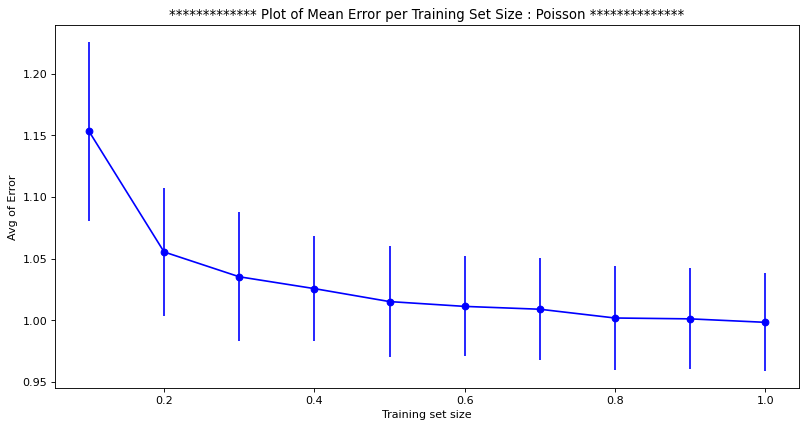


 		************* Plot of Mean Run time per iteration **************



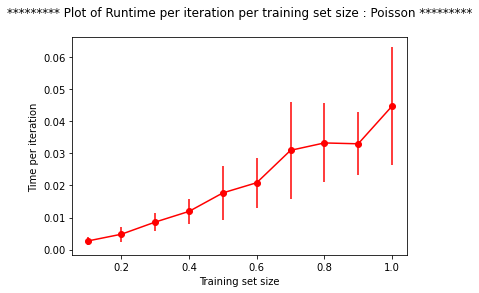


 		************* Plot of Mean GLM Iteration **************



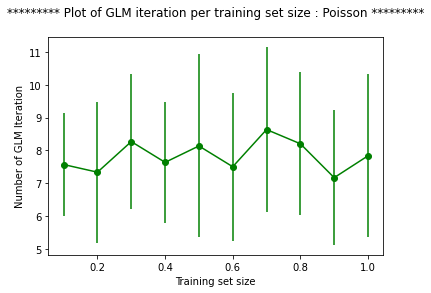

In [16]:
def poisson_GLM(phi,w,t_train,I,counter):
            
    y= np.dot(phi,w)
    y_i = []
    y_i = np.exp(y)
    y_i = np.asarray(y_i)
    y_i = y_i.reshape(len(y_i),1)
    d = t_train - y_i
    r=[]
    r = y_i.copy()
    R = np.diagflat(np.matrix(r))

    alpha = 10
    w_updated = w - np.dot(np.linalg.inv((-alpha*I-np.dot(np.dot(np.transpose(phi),R),phi))),(np.dot(np.transpose(phi),d) - alpha*w))
    w_updated = np.asarray(w_updated)


    if np.linalg.norm(w_updated - w)/np.linalg.norm(w) < 0.001:
        return (w_updated,counter)
    else:
        counter +=1
        return poisson_GLM(phi,w_updated,t_train,I,counter)
    
if __name__ == "__main__":
    
    train_set = read_files("AP.csv")
    train_label = read_files("labels-AP.csv")

    print("TRAINING SET : ",(len(train_set),len(train_set[0])),(len(train_label),len(train_label[0])))

    train_set_update = np.array(np.insert(train_set, 0, 1, axis=1),dtype = float)
    train_label = np.array(train_label,dtype=float)
    total_data = np.append(train_set_update,train_label,axis=1)

    errors_30_loops = []
    error_30_GLM_counts = []
    run_time_30_loops = []

    for i in range(30):

        np.random.shuffle(total_data)

        test_total_data = total_data[:int(len(total_data)/3),:]
        test_data_30= test_total_data[:,:-1]
        test_label_30 = test_total_data[:,-1]


        train_total_data = total_data[int(len(total_data)/3):,:]
        train_data_30= train_total_data[:,:-1]
        train_label_30 = train_total_data[:,-1]

        run_time=[]
        error_per_train_set_size = []
        training_size_GLM_counts = []

        for i in range(10):


            phi_train = train_total_data[:i*int(len(train_total_data)/10)+int(len(train_total_data)/10),:-1]
            t_train = train_total_data[:i*int(len(train_total_data)/10)+int(len(train_total_data)/10),-1]
            t_train = t_train.reshape(len(t_train),1)

            train_features = len(phi_train[0])
            train_size = len(phi_train)

            I = np.identity(train_features)

            w = np.random.normal(0,0.1, train_features)
            w = w.reshape(train_features,1)
            start= time.time()

            counter = 1
            w_final,GLM_counter = poisson_GLM(phi_train,w,t_train,I,counter)
            end= time.time()
            GLM_iteration_execution_time = end - start
            run_time.append(GLM_iteration_execution_time)

            y_t = np.dot(test_data_30,w_final)
            y_test = np.floor(np.exp(y_t))
            y_test = y_test.reshape(len(np.asarray(y_test)),1)

            t_predict = []

            #y_test = []
            #for i in range(len(y_t)):
                #y_test.append(np.exp(y_t[i]))


            #for i in range(len(y_test)):
                #y_test[i] = np.floor(float(y_test[i]))

            t_predict = y_test
            t_predict = np.reshape(t_predict,(len(t_predict),1))


            error_per_iteration = []
            for i in range(len(t_predict)):
                abs_error = abs(t_predict[i] - test_label_30[i])
                error_per_iteration.append(abs_error)
            error_per_train_set_size.append(np.mean(error_per_iteration))

            training_size_GLM_counts.append(GLM_counter)

        run_time_30_loops.append(run_time)
        errors_30_loops.append(error_per_train_set_size)
        error_30_GLM_counts.append(training_size_GLM_counts)

    narr_err = np.array(errors_30_loops)
    avg_of_training_errors = list(np.mean(narr_err, axis=0))
    sd_of_training_errors = list(np.std(narr_err,axis=0))

    narr_runtime = np.array(run_time_30_loops)
    avg_of_run_time = list(np.mean(narr_runtime, axis=0))
    sd_of_run_time = list(np.std(narr_runtime,axis=0))

    narr_GLM_iter = np.array(error_30_GLM_counts)
    avg_of_GLM_iter = list(np.mean(narr_GLM_iter, axis=0))
    sd_of_GLM_iter = list(np.std(narr_GLM_iter,axis=0))

    print("\n\t!!!!!!!!!!!!!!!! RESULTS Task 2 - Poisson !!!!!!!!!!!!!!!!\n")
    print("\n Mean of training errors per training set size : ",avg_of_training_errors)
    print("\n SD of training errors per training set size : ",sd_of_training_errors)
    print("\n Mean of run time per iteration per training set size : ",avg_of_run_time)
    print("\n Mean of GLM iterations per training set size : ",avg_of_GLM_iter)

    x = np.arange(0.1,1.1,0.1)
    figure(figsize=(12, 6), dpi=80) #dimensions of the figure
    plt.errorbar(x,avg_of_training_errors, yerr=sd_of_training_errors,color='b',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Avg of Error')
    plt.title('************* Plot of Mean Error per Training Set Size : Poisson **************')
    #plt.legend()
    print('\n \t\t************* Plot of Mean Errors **************\n')
    plt.show()

    #plt.plot(x,avg_of_run_time,color='r',label = "avg run time")
    plt.errorbar(x,avg_of_run_time, yerr=sd_of_run_time,color='r',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Time per iteration')
    plt.title('********* Plot of Runtime per iteration per training set size : Poisson *********\n')
    #plt.legend()
    print('\n \t\t************* Plot of Mean Run time per iteration **************\n')
    plt.show()

    #plt.plot(x,avg_of_GLM_iter,color='g',label = "avg GLM iteration")
    plt.errorbar(x,avg_of_GLM_iter, yerr=sd_of_GLM_iter,color='g',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Number of GLM Iteration')
    plt.title('********* Plot of GLM iteration per training set size : Poisson *********\n')
    #plt.legend()
    print('\n \t\t************* Plot of Mean GLM Iteration **************\n')
    plt.show()

## Ordinal

In [12]:
def sigmoid(x):
    try:
        return (1/(1+np.exp(-x)))
    except OverflowError:
        return 0 
    
    
def y_i_ti(phi,w,j):

    s = 1
    a = np.dot(phi,w)
    y_ij = s*(total_phi[j]-a)

    y_new = []
    for i in range(len(y_ij)):
        y_new.append(sigmoid(y_ij[i]))
    y_new = np.asarray(y_new)
    y_new = y_new.reshape(len(y_new),1)
    return y_new
    
def ordinal_GLM(phi,w,t,I,counter):
    
    d=[]
    for i in range(len(t)):
        d.append(y_i_ti(phi,w,int(t[i])) + y_i_ti(phi,w,int(t[i])-1) +1)
    d = np.asarray(d[0])
    d = d.reshape(len(d),1)

    r = []
    for i in range(len(t)):
        r.append([[y_i_ti(phi,w,int(t[i])) * (1 - y_i_ti(phi,w,int(t[i])) )] + [y_i_ti(phi,w,int(t[i])-1) * (1 - y_i_ti(phi,w,int(t[i])-1))]])


    R = np.diagflat(np.matrix(r[0][0][0]))

    alpha = 10

    w_updated = w - np.dot(np.linalg.inv((-alpha*I-np.dot(np.dot(np.transpose(phi),R),phi))),(np.dot(np.transpose(phi),d) - alpha*w))
    w_updated = np.asarray(w_updated)

    if np.linalg.norm(w_updated - w)/np.linalg.norm(w) < 0.001:
        return (w_updated,counter)
    else:
        counter +=1
        return ordinal_GLM(phi,w_updated,t_train,I,counter)

def y_i_ti_test(phi,w_final,j):
    y_ij = []
    s = 1
    a = np.dot(phi,w_final)
    y_ij = s*(total_phi[j]-a)

    def sigmoid(x):
        try:
            return (1/(1+np.exp(-x)))
        except OverflowError:
            return 0 

    y_test = []
    for i in range(len(y_ij)):
        y_test.append(sigmoid(y_ij[i]))
    y_test = np.asarray(y_test)
    y_test = y_test.reshape(len(y_test),1)
    return y_test
    
if __name__ == "__main__":
    
    train_set = read_files("AO.csv")
    train_label = read_files("labels-AO.csv")

    print("TRAINING SET : ",(len(train_set),len(train_set[0])),(len(train_label),len(train_label[0])))

    train_set_update = np.array(np.insert(train_set, 0, 1, axis=1),dtype = float)
    train_label = np.array(train_label,dtype=float)
    total_data = np.append(train_set_update,train_label,axis=1)

    errors_30_loops = []
    error_30_GLM_counts = []
    run_time_30_loops = []
    
    phi_0 = float('-inf')
    phi_1 = -2
    phi_2 = -1
    phi_3 = 0
    phi_4 = 1
    phi_5 = float('inf')
    s = 1
    total_phi = [phi_0,phi_1,phi_2,phi_3,phi_4,phi_5]
    
    for i in range(30):
        
        np.random.shuffle(total_data)

        test_total_data = total_data[:int(len(total_data)/3),:]
        test_data_30= test_total_data[:,:-1]
        test_label_30 = test_total_data[:,-1]


        train_total_data = total_data[int(len(total_data)/3):,:]
        train_data_30= train_total_data[:,:-1]
        train_label_30 = train_total_data[:,-1]

        run_time=[]
        error_per_train_set_size = []
        training_size_GLM_counts = []

        for i in range(10):

            phi_train = train_total_data[:i*int(len(train_total_data)/10)+int(len(train_total_data)/10),:-1]
            t_train = train_total_data[:i*int(len(train_total_data)/10)+int(len(train_total_data)/10),-1]
            t_train = t_train.reshape(len(t_train),1)
            t_train = t_train.astype(np.int32)

            train_features = len(phi_train[0])
            train_size = len(phi_train)

            I = np.identity(train_features)

            w = np.random.normal(0,0.1, train_features)
            w = w.reshape(train_features,1)
            a = np.dot(phi_train,w)
            
            start= time.time()
            
            counter = 1
            w_final,GLM_counter = ordinal_GLM(phi_train,w,t_train,I,counter)
            end= time.time()
            GLM_iteration_execution_time = end - start
            run_time.append(GLM_iteration_execution_time)
            
            p_1 = y_i_ti_test(test_data_30,w_final,1) - y_i_ti_test(test_data_30,w_final,0)
            p_2 = y_i_ti_test(test_data_30,w_final,2) - y_i_ti_test(test_data_30,w_final,1)
            p_3 = y_i_ti_test(test_data_30,w_final,3) - y_i_ti_test(test_data_30,w_final,2)
            p_4 = y_i_ti_test(test_data_30,w_final,4) - y_i_ti_test(test_data_30,w_final,3)
            p_5 = y_i_ti_test(test_data_30,w_final,5) - y_i_ti_test(test_data_30,w_final,4)

            all_p_values = np.append(p_1,p_2,axis=1)
            all_p_values = np.append(all_p_values,p_3,axis=1)
            all_p_values = np.append(all_p_values,p_4,axis=1)
            all_p_values = np.append(all_p_values,p_5,axis=1)

            t_predict = []
            for i in range(len(all_p_values)):
                t_predict.append(np.argmax(all_p_values[i]))
            t_predict = np.reshape(t_predict,(len(t_predict),1))

            #print(len(t_predict))
            #print(t_predict)
            error_per_iteration = []
            for i in range(len(t_predict)):
                abs_error = abs(t_predict[i] - test_label_30[i])
                error_per_iteration.append(abs_error)
            error_per_train_set_size.append(np.mean(error_per_iteration))

            training_size_GLM_counts.append(GLM_counter)

        run_time_30_loops.append(run_time)
        errors_30_loops.append(error_per_train_set_size)
        error_30_GLM_counts.append(training_size_GLM_counts)

    narr_err = np.array(errors_30_loops)
    avg_of_training_errors = list(np.mean(narr_err, axis=0))
    sd_of_training_errors = list(np.std(narr_err,axis=0))

    narr_runtime = np.array(run_time_30_loops)
    avg_of_run_time = list(np.mean(narr_runtime, axis=0))
    sd_of_run_time = list(np.std(narr_runtime,axis=0))

    narr_GLM_iter = np.array(error_30_GLM_counts)
    avg_of_GLM_iter = list(np.mean(narr_GLM_iter, axis=0))
    sd_of_GLM_iter = list(np.std(narr_GLM_iter,axis=0))

    print("\n\t!!!!!!!!!!!!!!!! RESULTS Task 2 - Poisson !!!!!!!!!!!!!!!!\n")
    print("\n Mean of training errors per training set size : ",avg_of_training_errors)
    print("\n Mean of run time per iteration per training set size : ",avg_of_run_time)
    print("\n Mean of GLM iterations per training set size : ",avg_of_GLM_iter)

    x = np.arange(0.1,1.1,0.1)
    figure(figsize=(12, 6), dpi=80) #dimensions of the figure
    plt.errorbar(x,avg_of_training_errors, yerr=sd_of_training_errors,color='b',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Avg of Error')
    plt.title('************* Plot of Mean Error per Training Set Size : Poisson **************')
    plt.legend()
    print('\n************* Plot of Mean Errors **************\n')
    plt.show()

    #plt.plot(x,avg_of_run_time,color='r',label = "avg run time")
    plt.errorbar(x,avg_of_run_time, yerr=sd_of_run_time,color='r',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Time per iteration')
    plt.title('********* Plot of Runtime per iteration per training set size : Poisson *********\n')
    plt.legend()
    print('\n************* Plot of Mean Run time per iteration **************\n')
    plt.show()

    #plt.plot(x,avg_of_GLM_iter,color='g',label = "avg GLM iteration")
    plt.errorbar(x,avg_of_GLM_iter, yerr=sd_of_GLM_iter,color='g',fmt='-o')
    plt.xlabel('Training set size')
    plt.ylabel('Number of GLM Iteration')
    plt.title('********* Plot of GLM iteration per training set size : Poisson *********\n')
    plt.legend()
    print('\n************* Plot of Mean GLM Iteration **************\n')
    plt.show()

TRAINING SET :  (2000, 60) (2000, 1)


<ipython-input-12-7914649a6cee>:3: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))
<ipython-input-12-7914649a6cee>:55: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


KeyboardInterrupt: 